In [37]:
import numpy as np
import pandas as pd
import glob
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import entropy
from scipy.optimize import curve_fit
import datetime
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic' # 폰트설정
matplotlib.rcParams['font.size'] = 10 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

In [23]:
os.chdir(r'C:\Users\pjk98\Data\New_Folder\SSJD1_20230601')
file_list = glob.glob("./*.csv", recursive=True)

In [4]:
df = pd.read_csv(file_list[0], sep=',',header=0)
df

,Unnamed: 0,Time,External Sound,Ambient Temp.,Target Temp.
0,1,2023-06-01 01:48:00,455,26.45,27.75
1,2,2023-06-01 01:48:00,498,26.45,27.75
2,3,2023-06-01 01:48:00,677,26.45,27.75
3,5,2023-06-01 01:48:00,523,26.45,27.75
4,6,2023-06-01 01:48:00,288,26.45,27.75
...,...,...,...,...,...
595,602,2023-06-01 01:48:00,422,26.65,28.01
596,603,2023-06-01 01:48:00,470,26.65,28.01
597,604,2023-06-01 01:48:00,390,26.65,28.01
598,605,2023-06-01 01:48:00,530,26.65,28.01


In [5]:
drop_columns=['Unnamed: 0', 'Time','Ambient Temp.', 'Target Temp.']
df.drop(labels=drop_columns, axis=1, inplace=True) # 불필요한 컬럼 제거
df

,External Sound
0,455
1,498
2,677
3,523
4,288
...,...
595,422
596,470
597,390
598,530


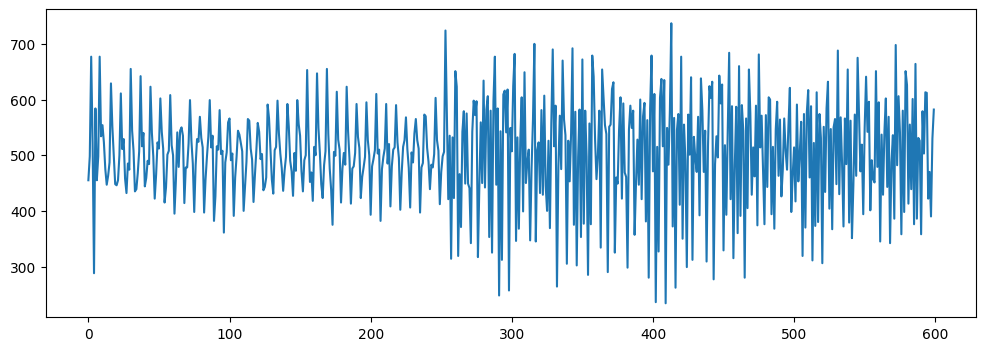

In [6]:
plt.figure(figsize=(12,4))
plt.plot(df['External Sound'])
plt.show()

In [7]:
def rms(stats):
    return(np.sqrt(np.mean(stats**2, axis=0)))
rms(df)
print(type(rms(df)))

<class 'pandas.core.series.Series'>


In [24]:
# 빈 데이터프레임 생성
time_df = pd.DataFrame()

# 파일 순회
for file in file_list:
    # CSV 파일 읽기
    df = pd.read_csv(file)
    
    # 'Time' 컬럼이 존재하는지 확인
    if 'Time' in df.columns:
        # 첫 번째 'Time' 컬럼 값만 선택하여 데이터프레임에 추가
        time_value = df['Time'].iloc[0]
        df = pd.DataFrame({'Time': [time_value]})
        time_df = pd.concat([time_df, df], ignore_index=True)

# 결과 출력
time_df

,Time
0,2023-06-01 01:48:00
1,2023-06-01 01:48:01
2,2023-06-01 01:48:02
3,2023-06-01 01:48:03
4,2023-06-01 01:48:04
...,...
3655,2023-06-01 02:48:55
3656,2023-06-01 02:48:56
3657,2023-06-01 02:48:57
3658,2023-06-01 02:48:58


In [25]:
def calculate_peak(stats):
    return np.array([np.max(stats)])
def rms(stats):
    return(np.sqrt(np.mean(stats**2, axis=0)))


rms_arr = np.array([])
peak_arr = np.array([])

for file in file_list:
    # 데이터 파일 읽기
    df = pd.read_csv(file, sep=',', header=0)
    drop_columns = ['Unnamed: 0', 'Time', 'Ambient Temp.', 'Target Temp.']  # 신호처리할 필요 없는 컬럼
    df.drop(labels=drop_columns, axis=1, inplace=True)  # 불필요한 컬럼 제거
    
    # value 추출
    rms_value = rms(df.values)
    peak = calculate_peak(df.values)
    
    rms_arr = np.concatenate([rms_arr, rms_value], axis=0)
    peak_arr = np.concatenate([peak_arr, peak], axis=0)
rms_arr = rms_arr.reshape(len(file_list), 1)
peak_arr = peak_arr.reshape(len(file_list), 1)

Ex_RMS_df = pd.DataFrame(rms_arr, columns=['External Sound'])
Ex_PEAK_df = pd.DataFrame(peak_arr, columns=['External Sound'])
Ex_RMS_df['type'] = 'SSJD'
Ex_RMS_df['Time'] = time_df
Ex_PEAK_df['type'] = 'SSJD'
Ex_PEAK_df['Time'] = time_df
new_order = ['Time', 'External Sound', 'type']
Ex_RMS_df = Ex_RMS_df.reindex(columns=new_order)
Ex_PEAK_df = Ex_RMS_df.reindex(columns=new_order)
Ex_RMS_df['Time'] = pd.to_datetime(Ex_RMS_df['Time'])
Ex_PEAK_df['Time'] = pd.to_datetime(Ex_RMS_df['Time'])
Ex_PEAK_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time            3660 non-null   datetime64[ns]
 1   External Sound  3659 non-null   float64       
 2   type            3660 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 85.9+ KB


In [30]:
Ex_PEAK_df

,Time,External Sound,type
0,2023-06-01 01:48:00,511.292992,SSJD
1,2023-06-01 01:48:01,511.803223,SSJD
2,2023-06-01 01:48:02,515.268076,SSJD
3,2023-06-01 01:48:03,514.658985,SSJD
4,2023-06-01 01:48:04,512.579946,SSJD
...,...,...,...
3655,2023-06-01 02:48:55,514.852816,SSJD
3656,2023-06-01 02:48:56,513.194433,SSJD
3657,2023-06-01 02:48:57,514.015735,SSJD
3658,2023-06-01 02:48:58,514.423264,SSJD


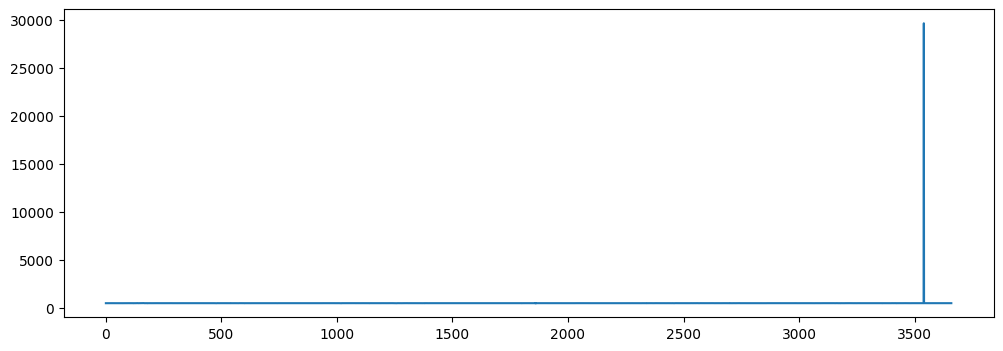

In [31]:
# SSJD1
plt.figure(figsize=(12,4))
plt.plot(Ex_PEAK_df['External Sound'])
plt.show()

In [33]:
# JS, CMPS, SSJD, SSNC. 결측치 및 이상 데이터를 포함하는 행을 제외한 Internal Sound 열
# faulttypelist = ['CMPS', 'JS', 'SSJD', 'SSNC']
# for j in faulttypelist:

def rms(stats):
    return np.array([(np.sqrt(np.mean(stats**2, axis=0)))])

j = 'SSJD'
os.chdir("C:\\Users\\pjk98\Data\\BeltforSharing\\Belt_"+j)
filelist = glob.glob('**/*.txt', recursive=True)

rms_arr = np.array([])
std_arr = np.array([]) 

time_df = pd.DataFrame()
for i in range(len(filelist)):
    currentfile = datetime.datetime(2023, int(filelist[i][:2]), int(filelist[i][3:5]), int(filelist[i][6:8]), int(filelist[i][9:11]), int(filelist[i][12:14]))
    with open(filelist[i], 'r') as file:
        data = []
        for line in file:
            values = line.strip().split(',')
            if len(values) == 3:
                data.append(values)
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")] = pd.DataFrame(data, columns=['Internal Sound', 'Ambient Temp.', 'Target Temp.']) # 동적 변수 생성
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Internal Sound'] = globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Internal Sound'].astype(int)
        # globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Ambient Temp.'] = globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Ambient Temp.'].astype(float) # 온도 데이터 필요할 때 살리세요.
        # globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Target Temp.'] = globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Target Temp.'].astype(float)
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")] = pd.DataFrame(globals()['A_'+currentfile.strftime("%m%d_%H%M%S")].loc[:, 'Internal Sound']) # 온도 데이터 필요할 때 죽이세요.
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Time'] = currentfile # Time 열 추가. 모든 행이 같은 시각.
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Time'] = pd.to_datetime(globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Time'])
        df = globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]
        
        # rms value 추출
        rms_value = rms(df['Internal Sound'].values)
        std = np.array([(df['Internal Sound'].values).std()])
        rms_arr = np.concatenate([rms_arr, rms_value], axis=0)
        std_arr = np.concatenate([std_arr, std], axis=0)
    
    if 'Time' in df.columns:
        # 첫 번째 'Time' 컬럼 값만 선택하여 데이터프레임에 추가
        time_value = df['Time'].iloc[0]
        df = pd.DataFrame({'Time': [time_value]})
        time_df = pd.concat([time_df, df], ignore_index=True) 
        
rms_arr = rms_arr.reshape(len(filelist), 1)
std_arr = std_arr.reshape(len(filelist), 1)
In_RMS_df = pd.DataFrame(rms_arr, columns=['Internal Sound'])
In_RMS_df['type'] = 'SSJD'
In_RMS_df['Time'] = time_df
new_order = ['Time','Internal Sound','type']
In_RMS_df = In_RMS_df.reindex(columns=new_order)
In_STD_df = pd.DataFrame(std_arr, columns=['Internal Sound'])
In_STD_df['type'] = 'SSJD'
In_STD_df['Time'] = time_df
new_order = ['Time','Internal Sound','type']
In_STD_df = In_STD_df.reindex(columns=new_order)
In_STD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3530 entries, 0 to 3529
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time            3530 non-null   datetime64[ns]
 1   Internal Sound  3530 non-null   float64       
 2   type            3530 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 82.9+ KB


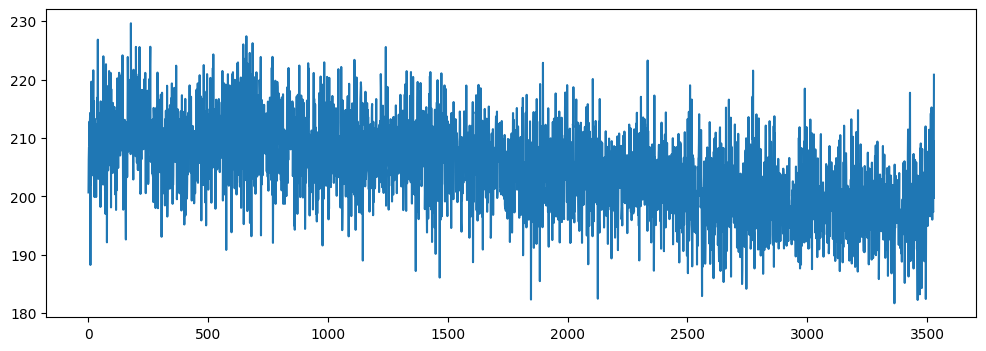

In [34]:
# SSJD Internal Sound
plt.figure(figsize=(12,4))
plt.plot(In_STD_df['Internal Sound'])
plt.show()

In [14]:
os.chdir(r'C:\Users\pjk98\Data\Tension\SSJD1')
file_list = glob.glob("./*.csv", recursive=True)

# for i in range(len(file_list)):
Tension_df = pd.read_csv(file_list[0], sep=',',header=0,encoding='CP949')
Tension_df.columns=['Time','Tension','이건 뭐징??']
drop_columns=['이건 뭐징??']
Tension_df.drop(labels=drop_columns, axis=1, inplace=True) # 불필요한 컬럼 제거
Tension_df['type'] = 'SSJD'
Tension_df

,Time,Tension,type
0,[2023/06/01] 01:49:17,108.0,SSJD
1,[2023/06/01] 01:49:18,107.0,SSJD
2,[2023/06/01] 01:49:19,113.0,SSJD
3,[2023/06/01] 01:49:20,108.0,SSJD
4,[2023/06/01] 01:49:21,104.0,SSJD
...,...,...,...
3595,[2023/06/01] 02:49:12,98.0,SSJD
3596,[2023/06/01] 02:49:13,139.0,SSJD
3597,[2023/06/01] 02:49:14,107.0,SSJD
3598,[2023/06/01] 02:49:15,105.0,SSJD


In [15]:
Tension_df['Time'] = Tension_df['Time'].str.replace(r'\[|\]', '')
Tension_df['Time'] = Tension_df['Time'].str.replace(r'\/', '-')
Tension_df['Time'] = pd.to_datetime(Tension_df['Time'])
Tension_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Time     3600 non-null   datetime64[ns]
 1   Tension  3600 non-null   float64       
 2   type     3600 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 84.5+ KB


C:\Users\pjk98\AppData\Local\Temp\ipykernel_9788\2738122520.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Tension_df['Time'] = Tension_df['Time'].str.replace(r'\[|\]', '')
C:\Users\pjk98\AppData\Local\Temp\ipykernel_9788\2738122520.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Tension_df['Time'] = Tension_df['Time'].str.replace(r'\/', '-')


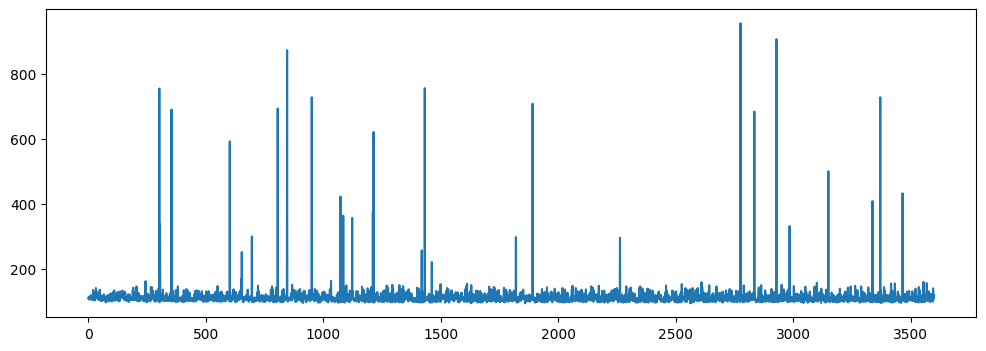

In [16]:
# SSJD Tension
plt.figure(figsize=(12,4))
plt.plot(Tension_df.Tension)
plt.show()

In [39]:
# 3개의 데이터프레임 병합
SSJD = pd.merge(Tension_df, Ex_PEAK_df, on='Time')
SSJD = pd.merge(SSJD, In_STD_df, on='Time')
# new_order = ['Time', 'Tension', 'External Sound', 'type']
new_order = ['Time','Tension','Internal Sound', 'External Sound', 'type']
SSJD = SSJD.reindex(columns=new_order)
SSJD['type'] = 'SSJD'

print(SSJD)

                    Time  Tension  Internal Sound  External Sound  type
0    2023-06-01 01:49:17    108.0      196.994977      513.060198  SSJD
1    2023-06-01 01:49:18    107.0      214.851984      512.357208  SSJD
2    2023-06-01 01:49:19    113.0      222.638157      513.127344  SSJD
3    2023-06-01 01:49:20    108.0      199.728766      514.613141  SSJD
4    2023-06-01 01:49:21    104.0      204.172227      512.946718  SSJD
...                  ...      ...             ...             ...   ...
3408 2023-06-01 02:48:55    105.0      204.501252      514.852816  SSJD
3409 2023-06-01 02:48:56    105.0      208.130400      513.194433  SSJD
3410 2023-06-01 02:48:57    112.0      192.382059      514.015735  SSJD
3411 2023-06-01 02:48:58    118.0      193.331494      514.423264  SSJD
3412 2023-06-01 02:48:59     97.0      202.747777      513.664234  SSJD

[3413 rows x 5 columns]


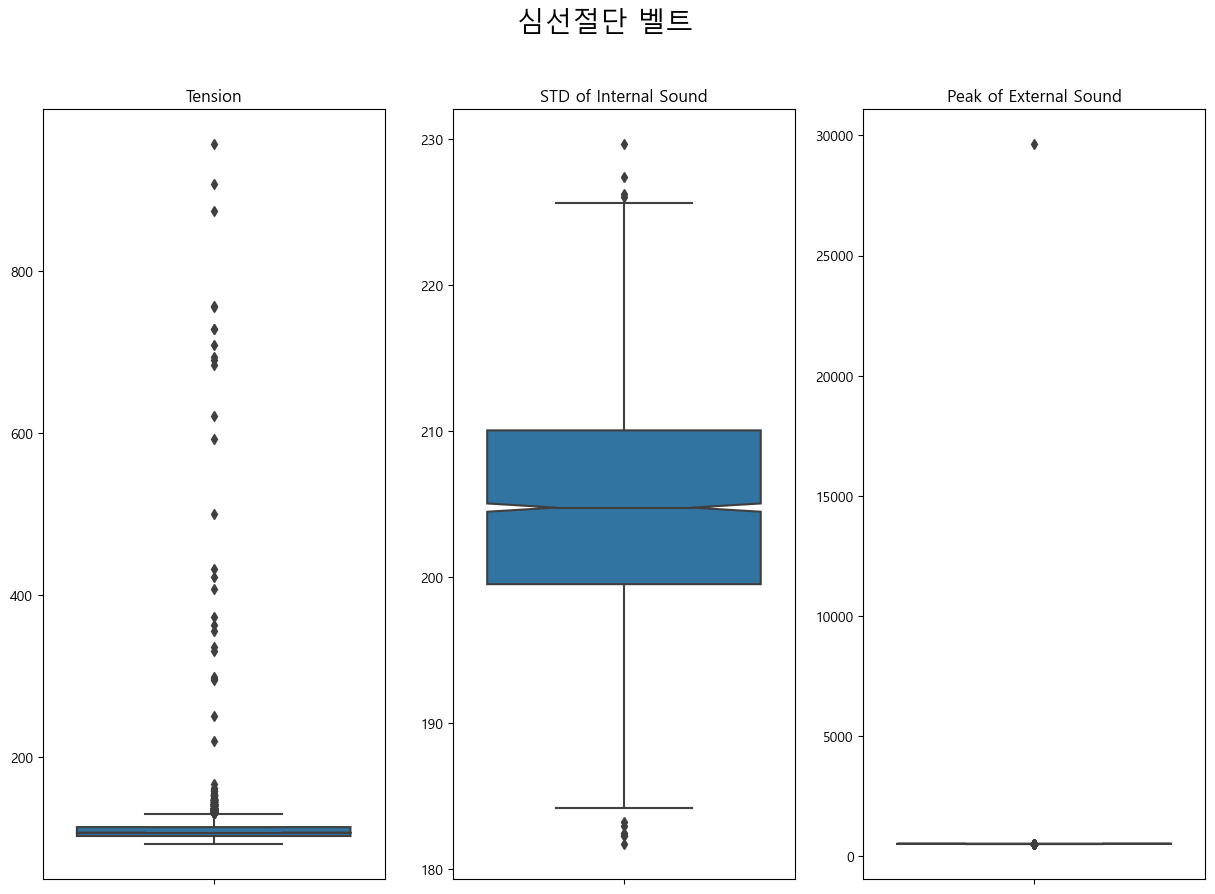

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(15, 10))

sns.boxplot(data=SSJD['Tension'], ax=axes[0], notch=True)
sns.boxplot(data=SSJD['Internal Sound'], ax=axes[1], notch=True)
sns.boxplot(data=SSJD['External Sound'], ax=axes[2], notch=True)

axes[0].set_title("Tension")
axes[1].set_title("STD of Internal Sound")
axes[2].set_title("Peak of External Sound")

axes[0].set_xticklabels([''])
axes[1].set_xticklabels([''])
axes[2].set_xticklabels([''])

plt.suptitle('심선절단 벨트', fontsize=20)

plt.show()

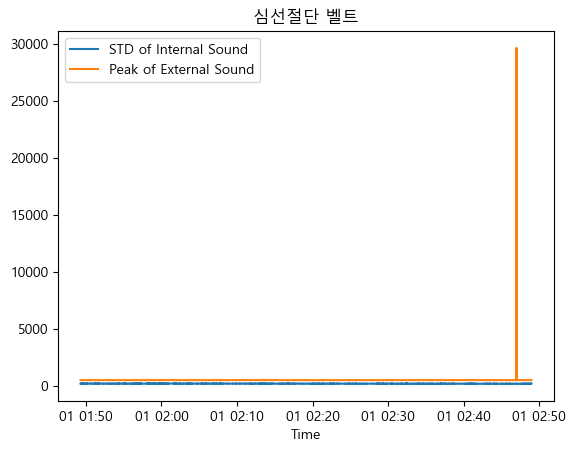

In [44]:
x = SSJD['Time']
y1 = SSJD['Internal Sound']
y2 = SSJD['External Sound']
plt.plot(x, y1, label='STD of Internal Sound')
plt.plot(x, y2, label='Peak of External Sound')

# 그래프 제목, 축 라벨 설정
plt.title('심선절단 벨트')
plt.xlabel('Time')
plt.ylabel('')

plt.legend()
plt.show()